# HLMA 408: Estimation et Tests

***
> __Auteur__: Joseph Salmon
> <joseph.salmon@umontpellier.fr>

<a id="sommaire"> </a>
## Sommaire

*  __[Introduction et présentation](#intro)__ <br>

<a id="intro"> </a>

# Introduction et présentation

## Import des packages usuels:

In [1]:
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from download import download
import seaborn as sns
from ipywidgets import interact  # widget manipulation
from scipy.special import comb, binom
from scipy.stats import poisson, binned_statistic, chisquare, chi2

## Commande "magique" pour un affichage plus avancé en Jupyter:

In [2]:
%matplotlib inline

## Préparation pour l'affichage graphique et sauvegarder les images:

In [3]:
# saving tools for the course:
sns.set_context("paper", font_scale=1)
sns.set_style("ticks")
sns.set_palette("colorblind")

# colors 
brown = (0.64, 0.16, 0.16)
purple = (148. / 255, 0, 211. / 255)


dirname = "../prebuiltimages/"
imageformat = ".pdf"

## Palindromes, ADN et  cytomegalovirus  (CMV)

Description des données:

"This  dataset  is  found  from
http://www.stat.berkeley.edu/users/statlabs/labs.html. 
It accompanies the excellent text Stat Labs:  Mathematical Statistics through Applications
Springer-Verlag (2001) by Deborah Nolan and Terry Speed."

Plus de détails:
https://www.stat.berkeley.edu/users/statlabs/papers/sample.pdf
(notamment sur les biais de collectes des données...)

## Téléchargement et import pour sauvegarder les données

In [4]:
# to use the default values of utils for instance
saving = True
path_target = "./utils.py"
url_shared_files = "http://josephsalmon.eu/enseignement/Montpellier/HLMA408/sharedcode/utils.py"
download(url_shared_files, path_target, replace=False)
from utils import my_saving_display

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


## Téléchargement et import des données

In [5]:
url = "http://josephsalmon.eu/enseignement/datasets/hcmv.data"
# url = "http://www.stat.berkeley.edu/users/statlabs/data/hcmv.data" # backup url, without header.
path_target = "./hcmv.data"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./hcmv.data'

In [6]:
df_mcv = pd.read_csv("hcmv.data", sep='\s+') # \s+ : for hanlding spaces
df_mcv.head(n=10)  # df stands for Data Frame

,location
0,177
1,1321
2,1433
3,1477
4,3248
5,3255
6,3286
7,7263
8,9023
9,9084


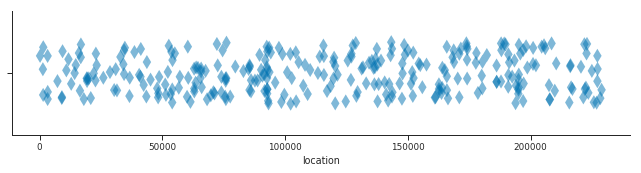

In [7]:
fig = plt.figure(figsize=(9,2.5))
# ax = sns.swarmplot(x=df_mcv["location"])
ax = sns.stripplot(x=df_mcv["location"],alpha=0.5,jitter = 0.2, size=10, marker="d")
plt.ylim([-0.4, 0.4])

sns.despine()
plt.tight_layout()
plt.show()
my_saving_display(fig, dirname,
                  "jitter_location", imageformat, saving=saving)

# Loi de Poisson et processus de Poisson 

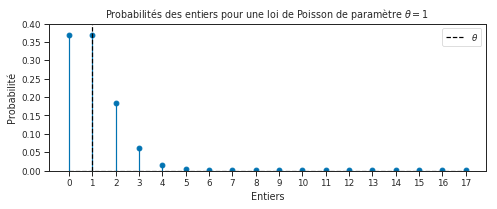

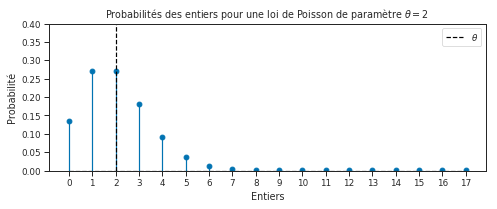

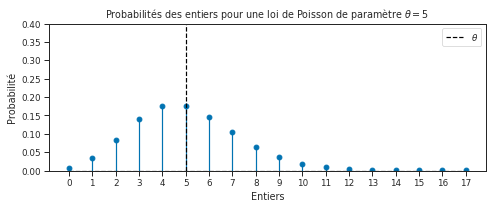

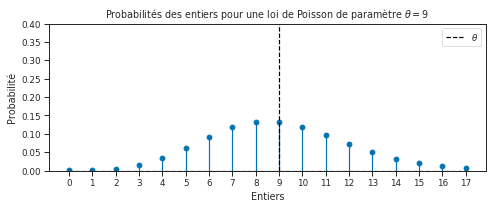

In [8]:
for i in [1, 2, 5, 9]:
    fig = plt.figure(figsize=(7, 3))
    theta = i
    plt.xlabel('Entiers')
    plt.ylabel('Probabilité')
    plt.title(
        "Probabilités des entiers pour une loi de Poisson de paramètre $\\theta={}$".format(theta))
    x = np.arange(18)
    plt.ylim([0, 0.4])
    plt.stem(x, poisson.pmf(x, theta), basefmt="k--")
    plt.xticks(x, x)
    plt.axvline(i, linestyle='--', color='k', label="$\\theta$")
    plt.tight_layout()
    plt.legend()
    plt.show()
    my_saving_display(fig, dirname,
                      "poisson_distrib_{}".format(theta), imageformat, saving=saving)

# Processus de Poisson

In [9]:
n_basis = 229354
n_palindromes = df_mcv.count()['location']
lambda_tot  = n_palindromes/n_basis

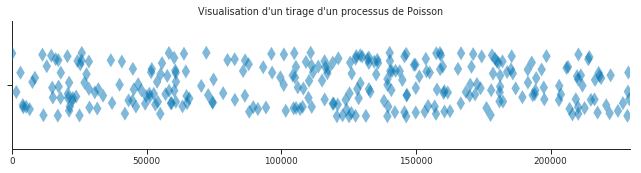

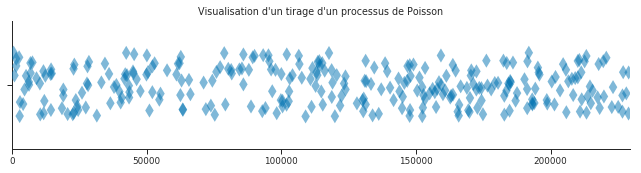

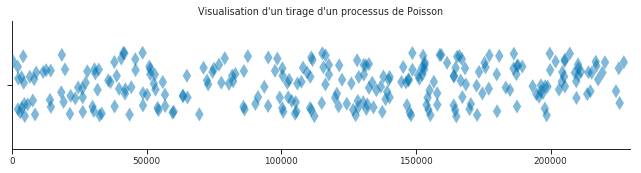

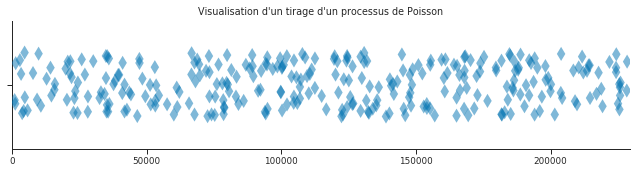

In [10]:
for i in range(4):
    n_to_sample = np.random.poisson(lambda_tot  *  n_basis)  # determine le nombre de points à tirer pour le processus.
#     points_from_poisson_prcs = np.random.randint(0,n_basis+1,size=n_to_sample) # on tire des points entier uniquement
    points_from_poisson_prcs = np.random.uniform(0,n_basis+1,size=n_to_sample)

    fig = plt.figure(figsize=(9,2.5))
    plt.title("Visualisation d'un tirage d'un processus de Poisson".format(theta))

    ax = sns.stripplot(x=points_from_poisson_prcs,alpha=0.5,jitter = 0.2, size=10, marker="d")
    plt.xlim([0, n_basis+1])
    plt.ylim([-0.4, 0.4])
    
    sns.despine()
    plt.tight_layout()
    plt.show()
    my_saving_display(fig, dirname,
                      "jitter_location_poisson_prcs{}".format(i), imageformat, saving=saving)

# Traitement des données pour obtenir un compte par plage de 4000 bp

In [11]:
lambda_hat = n_palindromes/n_basis * 4000
lambda_hat

5.162325488110083

In [12]:
n_palindromes

296

In [13]:
n_palindromes/n_basis

0.0012905813720275208

In [14]:
bins = np.arange(1, n_basis, step=4000)
n_bins = bins.shape[0]
n_bins

58

In [15]:
bins[-3:]  # check the last will be [228001, \infty]....
bins.shape


(58,)

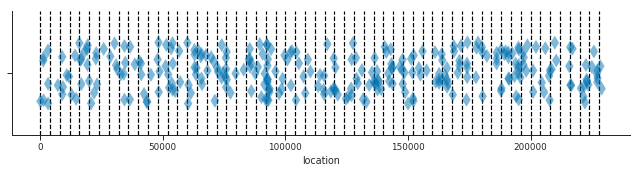

In [16]:
# display bins:
fig = plt.figure(figsize=(9, 2.5))
ax = sns.stripplot(x=df_mcv["location"], alpha=0.5,
                   jitter=0.2, size=10, marker="d")
ax.vlines(bins, np.repeat(-0.4, n_bins),
           np.repeat(0.4, n_bins), linestyle='--', color='k')
plt.ylim([-0.4, 0.4])

sns.despine()
plt.tight_layout()
plt.show()
my_saving_display(fig, dirname,
                  "jitter_location_bins", imageformat, saving=saving)

In [17]:
mcv_array = df_mcv['location'].values
mcv_array
mcv_count = np.zeros(n_basis,)  # XXX to put in sparse array 
mcv_count[mcv_array-1]=1
# plt.figure()
# plt.plot(mcv_count,'.')

In [18]:
# n, bins, patches = plt.hist(mcv_count,bins=100)
a=pd.cut(df_mcv['location'],bins,right=False,labels=bins[:-1])
# df_mcv['location']


In [19]:
counts_by_boxes = a.value_counts(sort=False)
counts_by_boxes.mean()

5.157894736842105

In [20]:
b= pd.cut(counts_by_boxes,[0,3,4,5,6,7,8,9,15],right=False,labels=['0-2','3','4','5','6','7','8','9-'])

In [21]:
counts_by_boxes_bis = b.value_counts(sort=False)
counts_by_boxes_bis.sum()

57

In [22]:
counts_by_boxes_bis

0-2     7
3       8
4      10
5       9
6       8
7       5
8       4
9-      6
Name: location, dtype: int64

In [23]:
poisson.cdf(2, lambda_hat)

0.1116293402733357

In [24]:
poisson.pmf(0, lambda_hat) + poisson.pmf(1, lambda_hat) + poisson.pmf(2, lambda_hat) # same  as before

0.11162934027333563

In [25]:
f_exp = np.array([poisson.cdf(2, lambda_hat),
                  poisson.pmf(3, lambda_hat),
                  poisson.pmf(4, lambda_hat),
                  poisson.pmf(5, lambda_hat),
                  poisson.pmf(6, lambda_hat),
                  poisson.pmf(7, lambda_hat),
                  poisson.pmf(8, lambda_hat),
                  1 - poisson.cdf(8, lambda_hat)]) * counts_by_boxes_bis.sum()
for i,val in enumerate(f_exp):
    print("Fréquence théorique de la case {0} vaut {1:0.1f}".format(i,val))

Fréquence théorique de la case 0 vaut 6.4
Fréquence théorique de la case 1 vaut 7.5
Fréquence théorique de la case 2 vaut 9.7
Fréquence théorique de la case 3 vaut 10.0
Fréquence théorique de la case 4 vaut 8.6
Fréquence théorique de la case 5 vaut 6.3
Fréquence théorique de la case 6 vaut 4.1
Fréquence théorique de la case 7 vaut 4.5


In [26]:
chi2_val,chi2_pval = chisquare(counts_by_boxes_bis, f_exp=f_exp)

In [27]:
chi2_val

1.0155776277763224

In [31]:
# Verification for course formula:
hattheta=counts_by_boxes.mean()
counts_by_boxes_bis.sum() * np.exp(-hattheta) * hattheta**3 / (3*2)

7.50059657173416

# Khi2

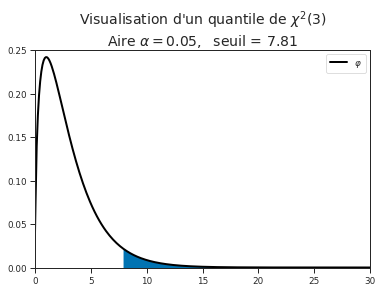

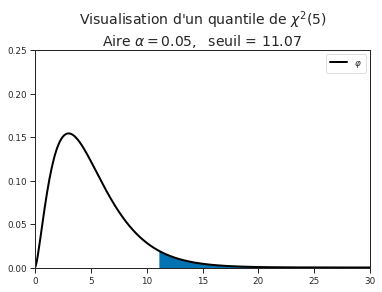

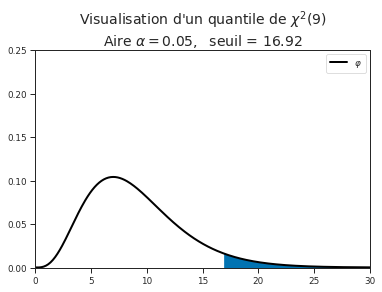

In [28]:
x = np.linspace(-1, 30, 300)

for df in [3, 5, 9]:
    alpha = 0.05
    quantile = chi2.ppf(1 - alpha, df)

    fig, ax1 = plt.subplots(1, 1)
    ax1.plot(x, chi2.pdf(x, df), 'k-', lw=2, label=r"$\varphi$")
    ax1.set_ylim(0, 0.25)
    ax1.set_xlim(0, 30)

    ax1.fill_between(x, 0, chi2.pdf(x, df), where=x <= -
                     quantile, color=sns.color_palette()[0])
    ax1.fill_between(x, 0, chi2.pdf(x, df), where=x >=
                     quantile, color=sns.color_palette()[0])
    # plt.axvline(x=0, c='k', ls="--", lw=1)
    plt.title(r"Visualisation d'un quantile de $\chi^2({})$".format(df) + "\n" +
              r"Aire $ \alpha = {0:.2f},$  seuil = ${1:.2f}$".format(alpha, quantile).format(df), fontsize=14)
    plt.legend()
    plt.show()
    my_saving_display(fig, dirname, "chi2_quantile005_" +
                      str(df), imageformat, saving=saving)

In [29]:
def chi2_quantile(alpha=0.9, df=5):
    """Visualize Chi2 quantiles"""
    quantile = chi2.ppf(1 - alpha, df)

    fig, ax1 = plt.subplots(1, 1)
    ax1.plot(x, chi2.pdf(x, df), 'k-', lw=2, label=r"$\varphi$")
    ax1.set_ylim(0, 0.25)
    ax1.set_xlim(0, 30)

    ax1.fill_between(x, 0, chi2.pdf(x, df), where=x <= -
                     quantile, color=sns.color_palette()[0])
    ax1.fill_between(x, 0, chi2.pdf(x, df), where=x >=
                     quantile, color=sns.color_palette()[0])
    # plt.axvline(x=0, c='k', ls="--", lw=1)
    plt.title(r"Visualisation d'un quantile de $\chi^2({})$".format(df) + "\n" +
              r"Aire $ \alpha = {0:.2f},$  seuil = ${1:.2f}$".format(alpha, quantile).format(df), fontsize=14)

    plt.legend()
    plt.show()

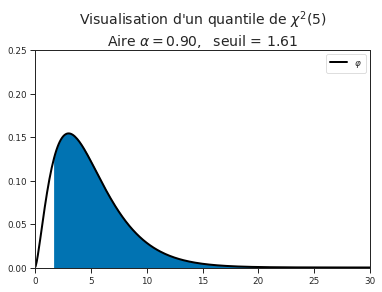

<function __main__.chi2_quantile>

In [30]:
%matplotlib inline

interact(chi2_quantile, alpha=(0.001, .999, 0.001),df=(1,20,1))  # change the first and second value to check more quantiles 